 método K-Vizinhos próximos -  K-Nearest Neighbours KNN - pode ser utilizado para resolver um problema de classificação. Esse modelo é um dos mais simples e intuitivos: seu treinamento consiste em armazenar cada uma das instâncias (ou exemplos) da base de treino e, através de uma função de distância e do número de vizinhos mais próximos, é capaz de predizer qual a classe de um novo indivíduo.

A simplicidade desse método tem um preço: ele é sensível a ruídos (aleatoriedade dos dados) e outliers, não possui uma capacidade alta de generalização e é altamente sensível a seu hiperparâmetro: o número de vizinhos mais próximos. Em situação de alta dimensionalidade não é muito efetivo e pouco eficiente. Seu tempo de treino costuma ser rápido, porém o tempo para predição envolve calcular a distância entre a instância (indivíduo) nova e todas as outras instâncias, sendo assim, em bases de dados muito grandes, esse método pode ter um tempo de execução alto. Em bases de dados balanceadas e representativas, esse modelo costuma ter bons resultados.

Agora trazendo um exemplo mais concreto: imagine a seguinte situação,uma exposição de veiculos antigos está ocorrendo em sua cidade e é informado em uma placa próxima a cada veículo, se este foi fabricado nos Estados Unidos, Japão ou Europa. Os carros estão espalhados pelo salão sem uma lógica aparente e em algum lugar existe um veículo que não tem uma placa de nacionalidade e você quer descobrir onde este carro foi fabricado. Seguindo a lógica do KNN você faria o seguinte: olharia os vizinhos mais próximos a este carro e veria onde eles foram fabricados, digamos que você decidiu olhar os cinco carros mais próximos, três deles eram dos Estados Unidos, um do Japão e por fim um da Europa e como existem mais carros fabricados nos Estados Unidos próximos ao seu, você induziria que o carro também foi fabricado lá. É importante dizer que a distância entre os carros pode ser física ou algo que mede similaridade entre atributos levando em consideração características dos carros. Vemos que a lógica do modelo é bem simples, porém bastante poderosa, com isso em mente podemos agora partir para codificação.

Continuando com a situação acima em mente, vamos aplicar nosso nosso modelo em forma de código.Vamos fazer apenas algumas modificações para que o método faça mais sentido - na situação acima informamos que os caros estavam dispostos sem uma lógica aparente e para o método fazer sentido vamos imaginar que os carros estejam dipostos segundo as seguintes variáveis: Milhas por litros (mpg), Número de cilindros (cylinders), Volume nos pistões (cubicines), Cavalos no motor(hp), Peso em libras (weigthlbs), Tempo de aceleração até 60 milhas por hora (time-for-60) e por fim o ano do carro (year).

Escolhidas as variáveis, vamos continuar primeiramente importando as bibliotecas que vamos usar:

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns #Usaremos esta biblioteca para plotar desta vez
from sklearn.model_selection import train_test_split# criar grupo de treino e teste
from sklearn.preprocessing import StandardScaler # normalizar os dados
from sklearn.neighbors import KNeighborsClassifier # biblioteca do metodo
from sklearn.metrics import classification_report, confusion_matrix # ajudar a medir a acuracia do método.

Então podemos importar nosso dataset e separar as classes de cada carro para facilitar a manipulação dos dados:

In [113]:
dataset= pd.read_csv("cars_.csv")
#visualizando os dados
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


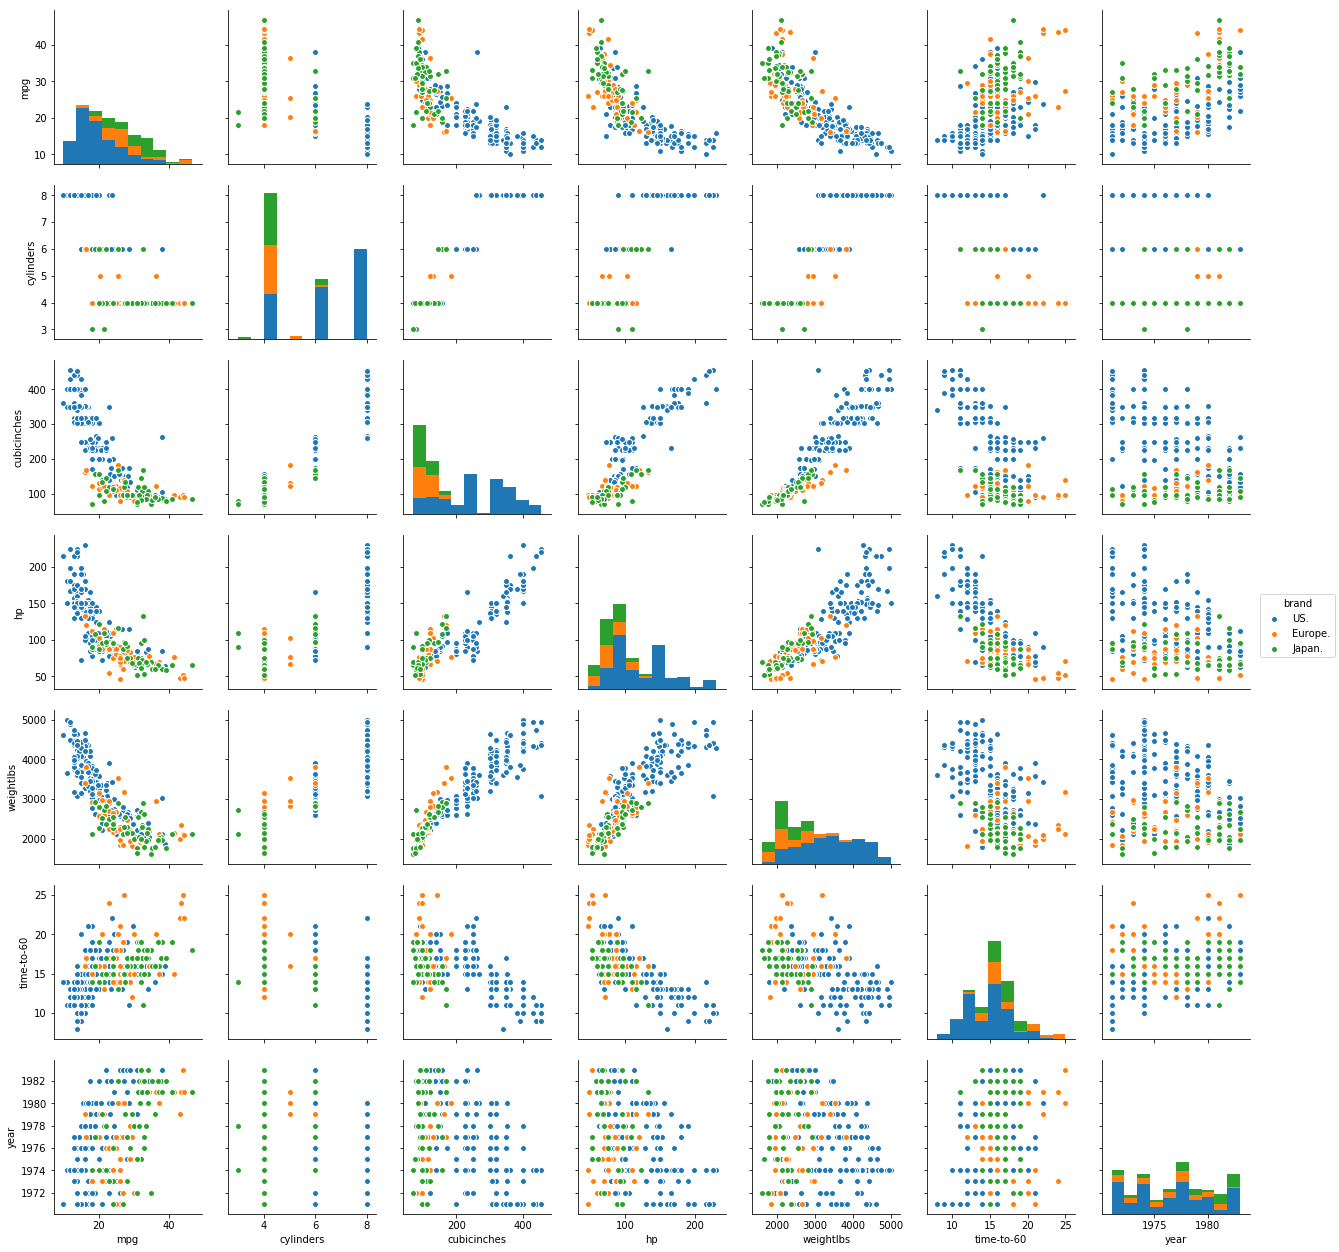

In [114]:

#plotando todos os dados pareados para melhor visualização

sns.pairplot(dataset, hue="brand")

In [115]:
# separando as classes
classe= dataset['brand']
dataset.drop(['brand'],axis=1,inplace= True)


Uma vez separadas as classes das variáveis, temos que criar nosso grupo de treino e nosso grupo de teste, para isso utilizamos uma função do python que é muito útil:

In [116]:
X_train, X_test, y_train, y_test = train_test_split(dataset,classe, test_size=0.20,random_state=100)  

Com os dados separados, só precisamos normalizá-los antes de aplicar o KNN:

In [117]:
  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

 Como foi dito no exemplo o método induz qual a classe do elemento olhando as classes dos seus vizinhos próximos, então é muito importante definir qual é o numero de vizinhos que se deve olhar para conseguir chegar a um número no qual o erro é minimizado. Para isso utilizamos o código abaixo para ver a média dos erros e usar o K (número de vizinho próximos) que gera menor número de erros na base de teste:

Text(0,0.5,'Média do erro')

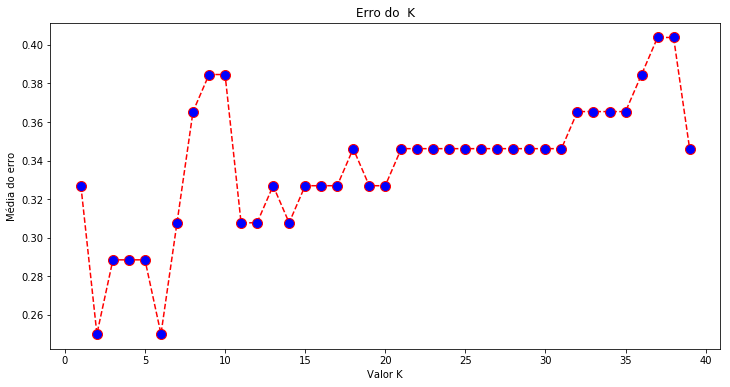

In [118]:
error=[]
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Erro do  K')  
plt.xlabel('Valor K')  
plt.ylabel('Média do erro')  

Nele fica bem claro os números que geram os menores erros para o método. Neste caso usaremos 6 como o número de vizinhos próximos, porém poderíamos usar o outro número com tranquilidade. Com o melhor K em mãos basta agora aplicar o método e testá-lo:

In [119]:

classif = KNeighborsClassifier(n_neighbors=6)  
classif.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [120]:
y_pred = classif.predict(X_test)  

In [121]:
classif.score(X_test,y_test)

0.75

Com o modelo apresentado temos uma precisão de 75\% em nosso grupo de teste. Porém, para validarmos o método precisamos de mais informações e para isso iremos usar uma matriz de confusão: ela nos permite ver se nosso método está acertando bem em todas as classes de nosso dataset, por exemplo. Você pode entender melhor este topico clicando aqui :http://minerandodados.com.br/index.php/2018/01/16/matriz-de-confusao/. Além da matriz vamos utilizar um reporte de classificação que o sklearn nos oferece:

In [122]:
 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[12  1  0]
 [ 2  7  1]
 [ 4  5 20]]
             precision    recall  f1-score   support

    Europe.       0.67      0.92      0.77        13
     Japan.       0.54      0.70      0.61        10
        US.       0.95      0.69      0.80        29

avg / total       0.80      0.75      0.76        52



Com esses métodos vemos que nosso modelo conseguiu acertar muito bem para os veículos dos Estados Unidos e Europa e acertando um pouco menos para veículos do Japão.